In [1]:
import numpy as np
import networkx as nx
import scipy.linalg as la
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import nb_general as nb

In [17]:
# Create multiple bipartite graphs
graphs = []
adj = []

In [18]:
for _ in range(50):
    graphs.append(bipartite.random_graph(int(np.random.choice(list(range(1,21)),1)),int(np.random.choice(list(range(1,21)),1)),.5))
for _ in graphs:
    adj.append(nx.adjacency_matrix(_).todense())
    

In [19]:
# Get B matrices
graphs_b = [nb.to_edge_space(g,graph=False,B=True)[1] for g in graphs]
  

In [96]:
# Make corresponding edge degree matrices
graphs_de = [np.diag(b.sum(axis=1)) for b in graphs_b]

In [38]:
# Check bounds on various graphs
print('    \tMax:\t\t\tMin:')
for i,b in enumerate(graphs_b):
    vals, vecs = la.eig(b)
    print(f'Test {i}\t{np.abs(vals).max()}\t{vals.min()}\t')

    	Max:			Min:
Test 0	4.355032716573083	(-4.355032716573083+0j)	
Test 1	7.028811916937233	(-7.028811916937222+0j)	
Test 2	7.27022683417366	(-7.27022683417365+0j)	
Test 3	6.037581435826405	(-6.037581435826405+0j)	
Test 4	2.692713736026988	(-2.692713736026988+0j)	
Test 5	1.7320508075688794	(-1.7320508075688794+0j)	
Test 6	6.881110567375629	(-6.881110567375629+0j)	
Test 7	0.0	0j	
Test 8	8.970376886682994	(-8.97037688668299+0j)	
Test 9	4.344637376641401	(-4.344637376641401+0j)	
Test 10	1.0000000000000004	(-1.0000000000000004+0j)	
Test 11	1.0000000000000004	(-1.0000000000000004+0j)	
Test 12	3.3975822432355236	(-3.397582243235523+0j)	
Test 13	5.084572945313132	(-5.0845729453131305+0j)	
Test 14	2.0289708755482647	(-2.0289708755482625+0j)	
Test 15	2.2361315961348693	(-2.2361315961348693+0j)	
Test 16	0.0	0j	
Test 17	4.287188386090971	(-4.287188386090971+0j)	
Test 18	7.004047592394866	(-7.004047592394866+0j)	
Test 19	0.0	0j	
Test 20	3.7329366887691	(-3.7329366887690982+0j)	
Test 21	2.626188512

In [101]:
# Generate own example
graphs_bp = []
for i,b in enumerate(graphs_b):
    place_holder = b.sum(axis=1)
    np.place(place_holder,place_holder==0,1)
    sub_de_graph = np.diag(place_holder)
    de_inv = la.solve(sub_de_graph,np.eye(sub_de_graph.shape[0]))
    graphs_bp.append(de_inv@b)
        

In [36]:
print('    \tMax:\t\t\tMax Degree:')
for i,b in enumerate(graphs_bp):
    vals, vecs = la.eig(b)
    print(f'{i}:\t{vals.max()}\t{vals.min()}\t{b.sum(axis=1).max()}')

    	Max:			Max Degree:


NameError: name 'graphs_bp' is not defined

# Small Example

In [2]:
G = bipartite.random_graph(3,3,.7)

In [3]:
A = nx.adjacency_matrix(G).todense()

In [4]:
A

matrix([[0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 1, 0],
        [0, 0, 0, 1, 1, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]], dtype=int64)

In [5]:
C, B = nb.to_edge_space(G,graph=False,B=True)

In [7]:
S, T = nb.create_s_t(G)

In [8]:
T

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [122]:
# Not bipartite
G_tilde = nx.Graph([[1,2],[2,3],[3,4],[4,5],[5,6],[4,7],[4,8],[8,2],[1,6],[3,7],[7,5],[7,4]])


In [124]:
C, B = nb.to_edge_space(G_tilde,graph=False,B=True)

In [125]:
la.eig(B)[0]

array([ 1.86007726+0.j        ,  0.63526716+1.10046964j,
        0.63526716-1.10046964j,  0.64447487+0.93878315j,
        0.64447487-0.93878315j,  0.08454005+1.2239624j ,
        0.08454005-1.2239624j , -1.12811602+0.53082314j,
       -1.12811602-0.53082314j, -0.49034326+1.4057532j ,
       -0.49034326-1.4057532j , -0.58289607+1.17847194j,
       -0.58289607-1.17847194j, -0.59296535+1.011592j  ,
       -0.59296535-1.011592j  ,  1.        +0.j        ,
        1.        +0.j        , -1.        +0.j        ,
       -1.        +0.j        , -1.        +0.j        ,
        1.        +0.j        ,  1.        +0.j        ])

In [ ]:
y = la.eig(B)[1][]

# Small Example 2

In [59]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([[1,4],[1,5],[2,5],[3,4],[3,5]])
A = nx.adjacency_matrix(G).todense()
C, B = nb.to_edge_space(G, graph = False, B=True)

In [60]:
A

matrix([[0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0]], dtype=int64)

In [61]:
la.eig(B)[0]

array([ 0.00000000e+00+0.j, -1.00000000e+00+0.j,  8.32667268e-17+1.j,
        8.32667268e-17-1.j,  1.00000000e+00+0.j, -1.00000000e+00+0.j,
        8.32667268e-17+1.j,  8.32667268e-17-1.j,  1.00000000e+00+0.j,
        0.00000000e+00+0.j])

In [62]:
y = la.eig(B)[1][:,5]

In [63]:
y_hat = la.eig(B)[1][:,8]

In [64]:
y

array([ 0.4472136+0.j,  0.       +0.j,  0.4472136+0.j,  0.       +0.j,
        0.4472136+0.j,  0.       +0.j, -0.4472136+0.j, -0.4472136+0.j,
        0.       +0.j,  0.       +0.j])

In [65]:
y_hat

array([0.4472136+0.j, 0.       +0.j, 0.4472136+0.j, 0.       +0.j,
       0.4472136+0.j, 0.       +0.j, 0.4472136+0.j, 0.4472136+0.j,
       0.       +0.j, 0.       +0.j])

In [66]:
x = 4+1j

In [67]:
np.abs(x)

4.123105625617661

In [68]:
vec = np.array([x,np.conj(x),5+6j,-4,7])
np.abs(vec)

array([4.12310563, 4.12310563, 7.81024968, 4.        , 7.        ])

In [69]:
bipartite.is_bipartite(nx.Graph(B))

True

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


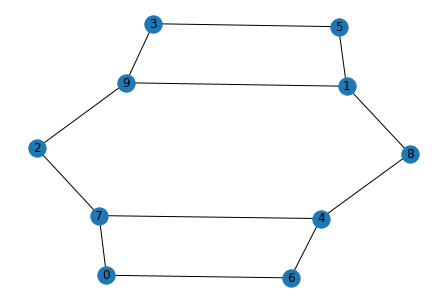

In [70]:
nx.draw(nx.Graph(B),with_labels=True)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


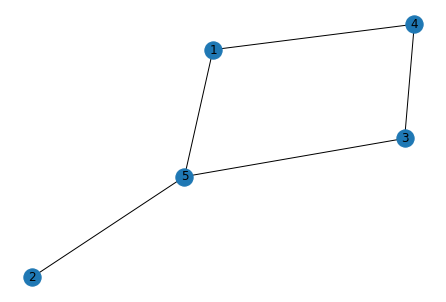

In [89]:
nx.draw(G,with_labels=True)

In [87]:
B@B@B@B@B@B

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

# $(\hat{D}-I)^{-1}B$

In [34]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
#G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([[1,4],[1,5],[2,5],[2,4],[3,4],[3,5]])
# G.add_edges_from([[1,4],[1,5],[2,5],[2,4],[3,4],[3,5],[6,2],[6,1]])
A = nx.adjacency_matrix(G).todense()
C, B = nb.to_edge_space(G, graph = False, B=True)
D = np.diag(list(dict(G.degree()).values()))
D_hat = np.diag(C.sum(axis=1))
# P = la.solve(D,np.eye(6))@A
P = la.solve(D,np.eye(5))@A
P_hat = la.solve(D_hat-np.eye(C.shape[1]),np.eye(C.shape[1]))@B

In [35]:
P

matrix([[0.        , 0.        , 0.        , 0.5       , 0.5       ],
        [0.        , 0.        , 0.        , 0.5       , 0.5       ],
        [0.        , 0.        , 0.        , 0.5       , 0.5       ],
        [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
        [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ]])

In [36]:
np.sort(la.eig(P_hat)[0])

array([-1.00000000e+00+0.j        , -7.07106781e-01+0.j        ,
       -7.07106781e-01+0.j        , -1.52221985e-16-0.70710678j,
       -1.52221985e-16+0.70710678j,  8.67361738e-17-0.70710678j,
        8.67361738e-17+0.70710678j,  1.24900090e-16-1.j        ,
        1.24900090e-16+1.j        ,  7.07106781e-01+0.j        ,
        7.07106781e-01+0.j        ,  1.00000000e+00+0.j        ])

In [37]:
np.sort(la.eig(B)[0])

array([-1.41421356e+00+0.j        , -1.00000000e+00+0.j        ,
       -1.00000000e+00+0.j        , -4.57966998e-16-1.41421356j,
       -4.57966998e-16+1.41421356j, -2.77555756e-17-1.j        ,
       -2.77555756e-17+1.j        ,  2.77555756e-17-1.j        ,
        2.77555756e-17+1.j        ,  1.00000000e+00+0.j        ,
        1.00000000e+00+0.j        ,  1.41421356e+00+0.j        ])

In [24]:
lambda_1 = np.sort(la.eig(B)[0])[-1]
mu_1 = np.sort(la.eig(P_hat)[0])[-1]

In [32]:
factor = mu_1/lambda_1

In [33]:
factor*(np.sort(la.eig(B)[0])[-2])

(0.5897545123014601+0j)

In [31]:
factor

(1.6956207695598566+0j)

In [38]:
A

matrix([[0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0]], dtype=int64)

In [39]:
D

array([[2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 3]])